# Data Plotting

> [Return to Examples List](README.md)

This example shows how to plot every file from a directory, labeling them by a detail of the procedure.

## Load Experiment Data
Here we load all JSON files from a directory and extract the data as a pandas `DataFrame`, along with the heating rate.

In [1]:
from tadatakit.classes import Experiment
import glob
kinetics_files = glob.glob("files/DSC kinetics/*.json")
experiments = {f.rsplit("/",1)[-1].split(".")[0]:Experiment.from_json(f) for f in kinetics_files}
experiments = {float(v.procedure.steps[1].name.strip("Ramp ").split(" ",1)[0]):v for k,v in experiments.items()}
dfs = {k:experiments[k].get_dataframe() for k in sorted(experiments.keys())}

## Plot The Data

Here we set up a single set of axes and use pandas' built in plotting functionality to display each curve.

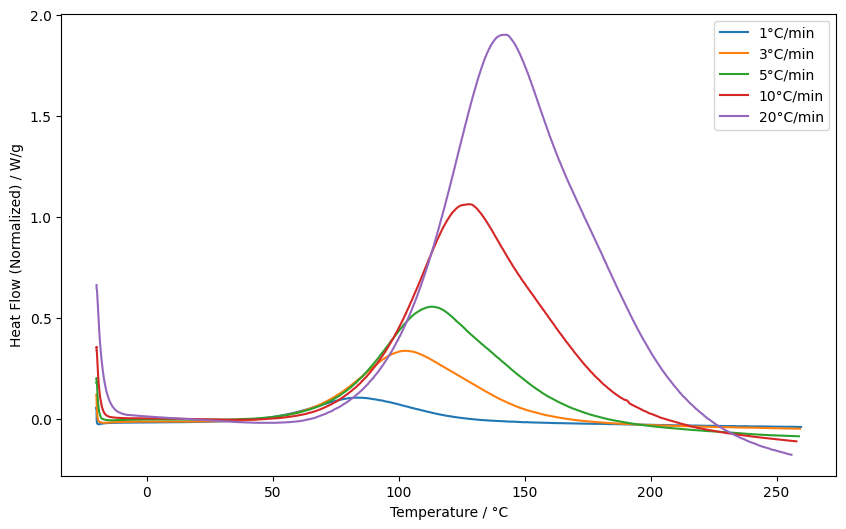

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
ax = plt.axes()
labels = []
for heating_rate, df in dfs.items():
    df.plot.line(x="Temperature / °C", y="Heat Flow (Normalized) / W/g", ax=ax)
    labels.append(f"{int(heating_rate)}°C/min")
plt.ylabel("Heat Flow (Normalized) / W/g")
_ = ax.legend(labels)